# 2D Plotting with Matplotlib
## Milestone 2: Visualize Hourly Trends on a Specific Day and Over Entire Duration

### 1. Import libraries

In [57]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Define the location of the data folder and the images folder
data_dir = "./data/"
img_dir = "./img/"

The magic command **`%matplotlib inline`** is a special instruction used in **Jupyter Notebooks** to control how Matplotlib plots are displayed.

Here’s what it does:

* It tells Jupyter to render all Matplotlib plots directly below the code cell that produced them, inside the notebook itself.
* Without it, depending on your setup, plots might open in a separate pop-up window, which is less convenient for exploratory analysis.
* It also makes the plots static images (PNG format by default). That means you can see them, but you cannot interact with them (e.g., rotate a 3D plot).

If you want interactive plots (where you can zoom, pan, or rotate), you’d use `%matplotlib notebook` instead.

In [59]:
%matplotlib inline

1. **`matplotlib.backends.backend_pdf`**

   * This is a Matplotlib *backend module* designed for working with **PDF output**.
   * Backends are the “engines” Matplotlib uses to render figures (to the screen, to PNG, to PDF, etc.).

2. **`PdfPages`**

   * `PdfPages` is a class in that backend.
   * It works like a *context manager* (similar to opening a file with `open()` in Python).
   * It allows you to append multiple figures into one multi-page PDF document.

3. **How you use it:**

   ```python
   from matplotlib.backends.backend_pdf import PdfPages
   import matplotlib.pyplot as plt

   # Create a PdfPages object (opens a new PDF file)
   pdf = PdfPages("my_plots.pdf")

   # First figure
   plt.plot([1,2,3], [4,5,6])
   plt.title("Plot 1")
   pdf.savefig()   # saves current figure to the PDF
   plt.close()

   # Second figure
   plt.plot([3,2,1], [6,5,4])
   plt.title("Plot 2")
   pdf.savefig()
   plt.close()

   pdf.close()  # finalizes the file
   ```

   Now `my_plots.pdf` contains two pages, one for each plot.

**Why it’s useful:**
Instead of having dozens of separate PNGs or PDFs, you can bundle all plots from a milestone or project into a single PDF file—great for reports or sharing results.

In [60]:
from matplotlib.backends.backend_pdf import PdfPages

In [61]:
# Create PdfPages object
pdf = PdfPages(img_dir+"P1_M2.pdf")

## First Chart

### 1. Read data and extract Columns
From the day-specific DataFrame (for the date 2017-08-12) you created in Milestone 1, extract two columns—hour and Rented Bike Count.

In [62]:
# read the dataframe created in Milestone 1
bikes = pd.read_csv(data_dir+"bikes.csv",  
                    encoding = 'unicode_escape',   
                    dayfirst = True,
                    parse_dates=['Date']
                  )

In [63]:
selected_date = bikes.loc[0,"Date"]
selected_date

Timestamp('2017-08-12 00:00:00')

In [64]:
selected_date.strftime("%Y-%m-%d")

'2017-08-12'

In [65]:
# inspect the DataFrame
bikes

,Date,Hour,Rented Bike Count
0,2017-08-12,8,780
1,2017-08-12,9,395
2,2017-08-12,10,261
3,2017-08-12,11,310
4,2017-08-12,12,355
5,2017-08-12,13,354
6,2017-08-12,14,350
7,2017-08-12,15,362
8,2017-08-12,16,401
9,2017-08-12,17,500


In [66]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               13 non-null     datetime64[ns]
 1   Hour               13 non-null     int64         
 2   Rented Bike Count  13 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 444.0 bytes


In [67]:
# Create series with the Hour and Rented Bike Count columns
x = bikes["Hour"]
y = bikes["Rented Bike Count"]

### 2. Find the minimum and maximum bike rental
Find the hour between 8 a.m. and 8 p.m., when the minimum and maximum number of bikes were rented on 2017-08-12.

In [68]:
# find the index of the minimum number of bikes
idx_min = y.idxmin()
print(f"Min index {idx_min}")
min_p1 = (x[idx_min], y[idx_min])
print(f"Min hour: {min_p1[0]} - Min number of bikes: {min_p1[1]}")
# and the maximum number of bikes
idx_max = y.idxmax()
print(f"Max index {idx_max}")
max_p1 = (x[idx_max], y[idx_max])
print(f"Max hour: {max_p1[0]} - Max number of bikes: {max_p1[1]}")


Min index 2
Min hour: 10 - Min number of bikes: 261
Max index 0
Max hour: 8 - Max number of bikes: 780


In [69]:
# check the results by ordering the DataFrame
bikes.sort_values(by = "Rented Bike Count")

,Date,Hour,Rented Bike Count
2,2017-08-12,10,261
3,2017-08-12,11,310
6,2017-08-12,14,350
5,2017-08-12,13,354
4,2017-08-12,12,355
7,2017-08-12,15,362
12,2017-08-12,20,384
1,2017-08-12,9,395
8,2017-08-12,16,401
11,2017-08-12,19,477


### 3. Create a scatterplot using the object oriented interface of Matplotlib
- Create objects for Figure and Axes for the first plot. Plot a line graph with with point markers.
- Your graph must have Hours on the x-axis and Rented Bike Count on the y-axis.

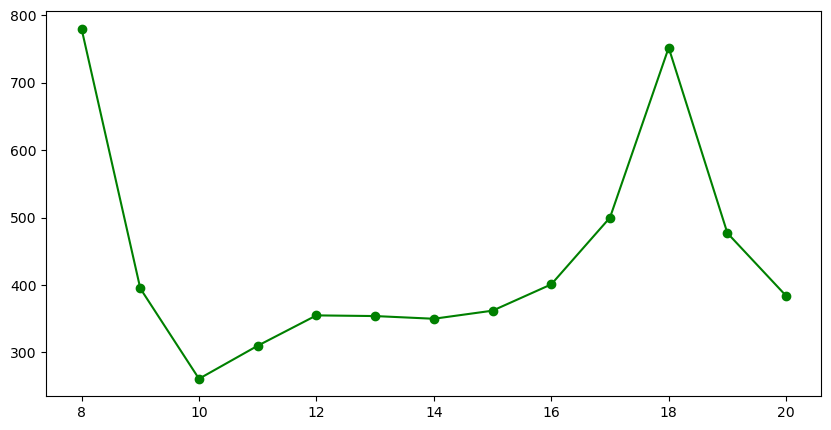

In [70]:
# create figure and axes objects
fig, ax = plt.subplots(figsize = (10,5))
# plot Hour vs. Rented Bike Count
ax.plot(x, y, marker = "o", color = "green")
plt.show()

### 4. Customize your plot
- Annotate the minimum and maximum points in your plot with text labels.
- Annotate all other points with their value.
- Set the labels for x and y axes and the title of the plot.
- Set limits for the x-axis and y-axis if required.
- Save your plot to the output pdf file using pdf.savefig().

#### Annotate all points with their values

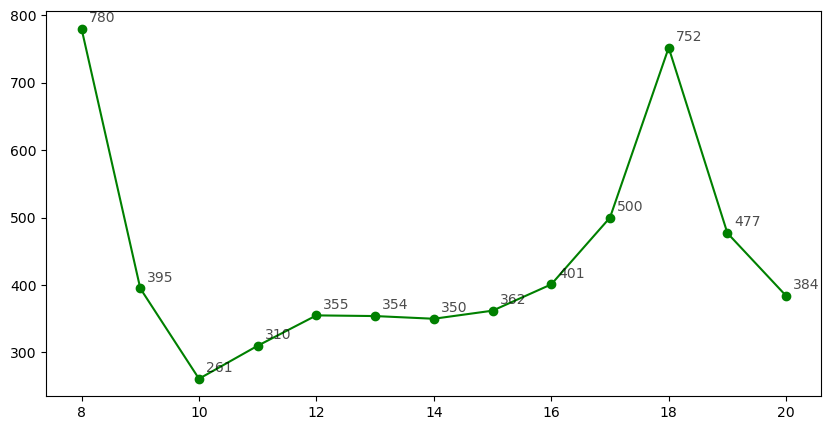

In [71]:
# create figure and axes
fig, ax = plt.subplots(figsize = (10,5))
# plot Hour vs. Rented Bike Count
ax.plot(x,y, marker = "o", color = "green")
# cycle over all points and annotate with bike count value
for h, b in zip(x, y):
        ax.annotate(text = b, xy = (h, b), xytext = (5, 5),  textcoords = 'offset points', alpha = 0.7 )
plt.show()

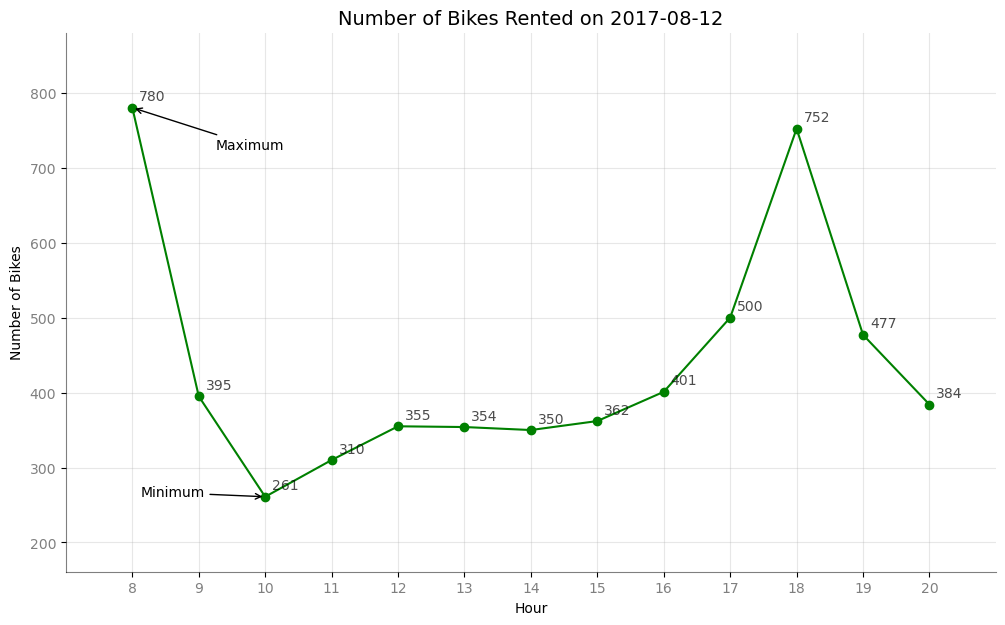

In [72]:
# create figure and axes objects
fig, ax = plt.subplots(figsize = (12,7))
# plot Hour vs. Rented Bike Count
ax.plot(x, y, marker = "o", color = "green")
ax.grid(True, alpha = 0.3)
# annotate the minimum and maximum points in your plot with text labels
ax.annotate("Minimum", min_p1, xycoords = 'data', xytext = (-90, 0), textcoords = 'offset points', arrowprops=dict(arrowstyle = "->") )
ax.annotate("Maximum", max_p1, xycoords = 'data', xytext = (60, -30), textcoords = 'offset points', arrowprops=dict(arrowstyle = "->") )
# cycle over all points and annotate with bike count value
for h, b in zip(x, y):
        ax.annotate(b, (h, b), xycoords = 'data', xytext = (5, 5), textcoords = 'offset points', alpha = 0.7 )
    
# set the labels for x and y axes and the title of the plot
ax.set_title("Number of Bikes Rented on %s" % selected_date.strftime("%Y-%m-%d"), fontsize = 14)
ax.set_xlabel("Hour")
ax.set_ylabel("Number of Bikes" )

# set limits for the x-axis and y-axis if required
ax.set_ylim(min(y) - 100, max(y)+100)
ax.set_xlim(min(x) - 1, max(x)+1)

# further customization
# get rid of right and top spine
ax.spines.right.set(visible = False)
ax.spines.top.set(visible = False)
ax.spines.left.set(alpha = 0.5)
ax.spines.bottom.set(alpha = 0.5)
ax.set_xticks(ticks = x, labels = x, alpha = 0.5)
plt.setp(ax.get_yticklabels(), alpha=0.5)

plt.show()

In [73]:
# Save your plot to the output pdf file using pdf.savefig()
pdf.savefig(fig)

## Second Chart
For the second chart, we need data for all the dates and all the hours from the original DataFrame created using read_csv()

In [74]:
# read the dataframe with all the observations
all_bikes = pd.read_csv(data_dir+"all_bikes.csv",  
                    encoding = 'unicode_escape',   
                    dayfirst = True,
                    parse_dates=['Date']
                  )

In [75]:
# inspect the first rows
all_bikes.head()

,Date,Hour,Rented Bike Count
0,2017-12-01,0,254
1,2017-12-01,1,204
2,2017-12-01,2,173
3,2017-12-01,3,107
4,2017-12-01,4,78


### 5. For the second scatter plot, extract two columns of data from the original DataFrame.
- Extract the Hour and Rented Bike Count columns.
- Group your data by the Hour column.
- Find the sum of values in each group.
- Find the hour when sum of total bikes rented is minimum and maximum (similar to in Step 2, but on all dates and hours of the day).

In [76]:
# group the DataFrame by Hour and add the number of rented bikes for each hour
# the resulting DataFrame has 24 rows and 2 columns
hour_rentals = all_bikes.groupby("Hour")[["Rented Bike Count"]].sum().reset_index()
hour_rentals

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396
5,5,50765
6,6,104961
7,7,221192
8,8,370731
9,9,235784


In [77]:
# select the Hour and Rented Bike Count of the grouped DataFrame
x2 = hour_rentals["Hour"]
y2 = hour_rentals["Rented Bike Count"]

In [78]:
# find the index of the minimum number of bikes
idx_min = y2.idxmin()
idx_max = y2.idxmax()

print(f"Min index {idx_min}")
print(f"Max index {idx_max}")

min_p2 = (x2[idx_min], y2[idx_min])
print(f"Min hour: {min_p2[0]} - Min number of bikes: {min_p2[1]}")

max_p2 = (x2[idx_max], y2[idx_max])
print(f"Max hour: {max_p2[0]} - Max number of bikes: {max_p2[1]}")

Min index 4
Max index 18
Min hour: 4 - Min number of bikes: 48396
Max hour: 18 - Max number of bikes: 548568


In [79]:
# check the results
hour_rentals.sort_values(by = "Rented Bike Count")

,Hour,Rented Bike Count
4,4,48396
5,5,50765
3,3,74216
6,6,104961
2,2,110095
1,1,155557
10,10,192655
0,0,197633
11,11,219311
7,7,221192


### 6. Create, customize, and save the second plot for data extracted in Step 5. 
This is similar to in Steps 3 and 4 above. Save your file.

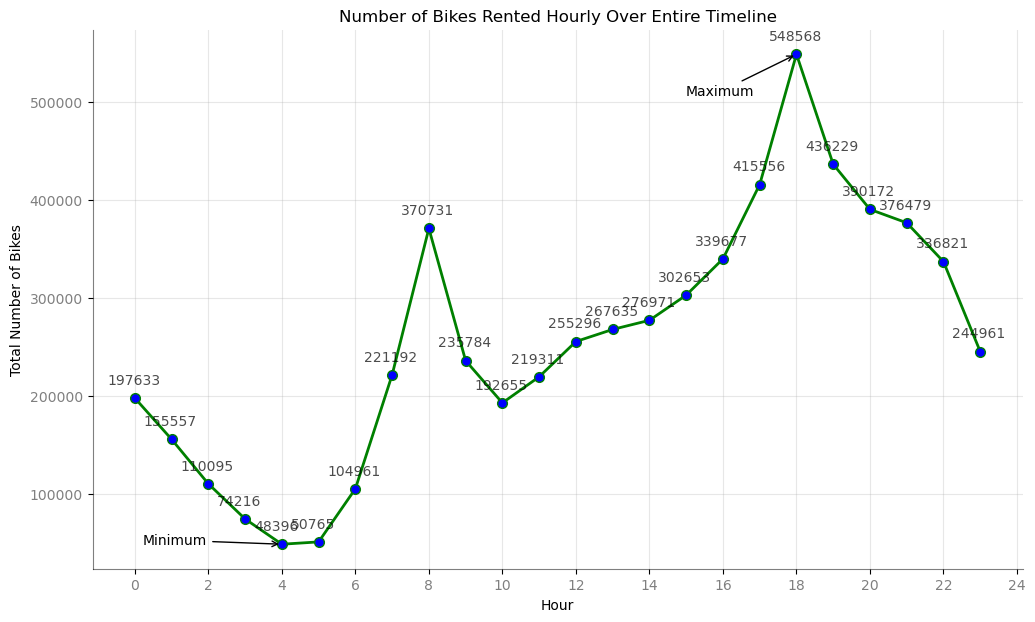

In [80]:
fig, ax = plt.subplots(figsize = (12,7))
ax.plot(hour_rentals.index, hour_rentals["Rented Bike Count"], marker ="o", color = "green", markerfacecolor='blue', linestyle='solid', linewidth=2, markersize=7)
ax.set(title = "Number of Bikes Rented Hourly Over Entire Timeline",
      xlabel = "Hour",
      ylabel = "Total Number of Bikes")
ax.grid(True, alpha = 0.3)
# Annotate the minimum and maximum points with text
ax.annotate('Minimum', xy = min_p2 , xycoords = 'data', xytext = (-100, 0), textcoords = 'offset points', arrowprops=dict(arrowstyle = "->") )
ax.annotate('Maximum', xy = max_p2 , xycoords = 'data', xytext = (-80, -30), textcoords = 'offset points', arrowprops=dict(arrowstyle = "->") )

# Annotate all points with their value
for h,b in zip(x2,y2):
    ax.annotate(str(b), xy=(h,b), xytext=(-20,10), textcoords='offset points', alpha =0.7)
    
# further customization
# get rid of right and top spine
ax.spines.right.set(visible = False)
ax.spines.top.set(visible = False)
ax.spines.left.set(alpha = 0.5)
ax.spines.bottom.set(alpha = 0.5)
x2_labels = [int(elem) for elem in np.linspace(0,24,13)]
ax.set_xticks(ticks = x2_labels, labels = x2_labels, alpha = 0.5)
plt.setp(ax.get_yticklabels(), alpha=0.5)


plt.show()

In [81]:
pdf.savefig(fig)

### 7. Close the Pdfpages object.
If you used with ... as ... syntax for writing to the Pdfpages object, you will not need to explicitly close it.

In [82]:
pdf.close()